<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Generación para el CLUR </font>
</div>

<div align="center"> 
<font size=5> Máscara de telfon </font>
</div>

- **Para**: Fabricación de máscaras en CLUR con laser de femtosegundos

- **Fecha**: 2024/02/28
        
- **Objetivos**: Máscara en teflón para Mahmoud

- **Descripción** - 

- **Referencias**: -

- **Autores**: Luis Miguel Sánchez Brea

In [1]:
from diffractio import np, plt, sp

import ezdxf

/home/luismiguel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend
import matplotlib.pyplot as plt

mm=1.
um=mm/1000.
nm = um/1000.

inches = 25.4*mm

In [15]:
dxf_params = dict(
    version="R2000",
    total_size=4*inches,
    num_masks=(4, 4),
    line_size=5*um
    )

# Definitions

In [4]:
def start_drawing(**dxf_params):
    
    version = dxf_params['version']
    total_size = dxf_params['total_size']
    num_masks = dxf_params['num_masks']
    line_size = dxf_params['line_size']
        
    dwg = ezdxf.new(version)
    msp = dwg.modelspace()
    total_size = total_size
    num_masks = np.array(num_masks)
    line_size = line_size
    mask_size = (total_size)/np.array(num_masks)  # -5*line_size

    return dwg, msp, mask_size

In [5]:
def rectangle(msp, r0: list[float], size: list[float], origin='0'):
    
    x0, y0 = r0
    sx, sy = size
    
    if origin == '0':
        init_point = np.array([0,0])
    elif origin == 'center':
        init_point = np.array([-sx/2, -sy/2])
    
    # print(init_point)
    points = np.array([(0,0), (sx,0), (sx,sy), (0,sy), (0,0)])
    points = points + r0 + init_point
    msp.add_lwpolyline(points, close=True)
    
    return msp

In [6]:
def draw(dwg, msp):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(dwg)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(msp, finalize=True)

In [7]:
def save_png(dwg, filename:str, dpi:int = 300, has_draw: bool = False):


    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(dwg)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(dwg.modelspace(), finalize=True)
    fig.savefig(filename, dpi=dpi)
    if has_draw is False:
        plt.close()

# Máscara

In [53]:
r0=(0*mm, 0*mm)
size_square = (20*um, 20*um)
pitch = (250*um, 250*um)
radius_external_circle = 12.5*mm/2
area_engraving = 1*mm, 1*mm
num_circles=21

In [57]:

x_init = -area_engraving[0]
x_end  = area_engraving[0]
xs=np.linspace(x_init, x_init + pitch[0]*num_circles, num_circles)

radii = np.linspace(5*um, 55*um, len(xs))



print(len(xs), len(ys), xs)
print(radii*1000)

21 50 [-1.     -0.7375 -0.475  -0.2125  0.05    0.3125  0.575   0.8375  1.1
  1.3625  1.625   1.8875  2.15    2.4125  2.675   2.9375  3.2     3.4625
  3.725   3.9875  4.25  ]
[ 5.   7.5 10.  12.5 15.  17.5 20.  22.5 25.  27.5 30.  32.5 35.  37.5
 40.  42.5 45.  47.5 50.  52.5 55. ]


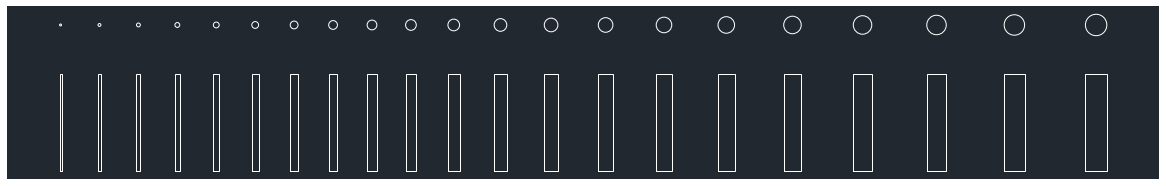

In [62]:
dwg, msp, mask_size = start_drawing(**dxf_params)

x0 = 0
y0  = 0
for i, x in enumerate(xs):
    size_square = 2*radii[i]
    r0 = (x0,y)
    x0 = max(x0 + 4*size_square, x0 + 200*um)

    msp=rectangle(msp, r0=r0, size= (size_square, 500*um), origin='center')


x0 = 0
y0  = 500*um 
for i, x in enumerate(xs):
    size_square = 2*radii[i]
    r0 = (x0,y0)
    x0 = max(x0 + 4*size_square, x0 + 200*um)

    msp.add_circle(center = r0 , radius = radii[i])



draw(dwg, msp)

name = '240228 clur - calibration 1'
dwg.saveas(name+'.dxf')
save_png(dwg, filename=name+'.png', dpi = 300)

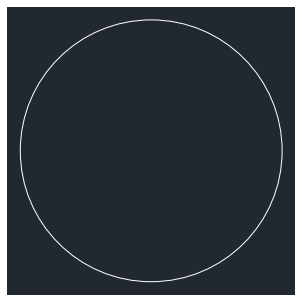

In [63]:
dwg_cut, msp_cut, mask_size = start_drawing(**dxf_params)


msp_cut.add_circle(center = (0,0), radius = radius_external_circle)

draw(dwg_cut, msp_cut)

dwg_cut.saveas(name+'.dxf')
save_png(dwg_cut, filename=name+'- final_cut.png', dpi = 300)

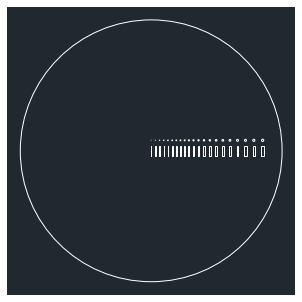

In [64]:


msp.add_circle(center = (0,0), radius = radius_external_circle)

draw(dwg, msp)

save_png(dwg, filename=name+'- all.png', dpi = 300)